In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch as tr
from torch import nn
import torch.nn.functional as F
import torchvision as tv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from impl.arch import *
from impl.rendering import *
from impl.data_source import *
from impl.misc import *

In [4]:
model = MultiHeadedNeRF(config=ModelConfig(
    hidden_size=128,
    embed_num_pos=6,
    embed_num_dir=6,
))

In [5]:
def predict(pose: torch.Tensor):
    return nf_render_pose(
        model,
        height,
        width,
        focal_length,
        pose=pose,
        thresh_near=2,
        thresh_far=6,
        num_samples_per_ray=32,
        chunk_size=8096,
    )

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train
for i in range(1000):
    idx = torch.randint(images.shape[0], (1,)).item()
    # idx = i % images.shape[0]
    target_pose = poses[idx]
    # (H, W, 3)
    target_image = images[idx]

    # (H, W, 3)
    image_predicted = predict(target_pose)

    loss = F.mse_loss(image_predicted, target_image)

    # if i % 100 == 0:
    #     print(f"{i}: {loss.item()}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Done")

Done


Showing index 17


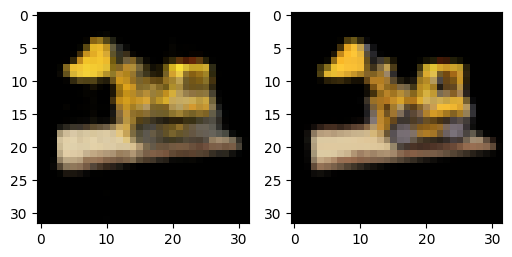

In [12]:
# test_idx = torch.randint(images.shape[0], (1,)).item()
test_idx = 17

print(f"Showing index {test_idx}")
plt.figure(figsize=(6,3))

predicted = predict(poses[test_idx]).detach()
plt.subplot(1,2,1)
plt.imshow(predicted)

plt.subplot(1,2,2)
plt.imshow(images[test_idx])

theta=35.98659896850586, phi=310.8047790527344


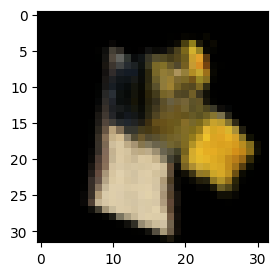

In [19]:
# View a truly random pose, sampled from a sphere around the object
plt.figure(figsize=(3,3))
plt.imshow(predict(random_spherical_pose()).detach())

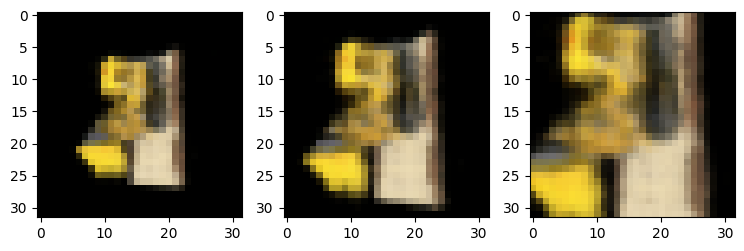

In [20]:
# View the same pose with varying distance of camera from the object
plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.imshow(predict(create_pose(radius=5, theta=10, phi=50)).detach())

plt.subplot(1,3,2)
plt.imshow(predict(create_pose(radius=4, theta=10, phi=50)).detach())

plt.subplot(1,3,3)
plt.imshow(predict(create_pose(radius=3, theta=10, phi=50)).detach())

In [ ]:
# torch.save({'model_state': model.state_dict()},'checkpoints/multihead_001.chk')

In [11]:
# checkpoint = torch.load('checkpoints/multihead_001.chk')
# model.load_state_dict(checkpoint['model_state'])